# This project will use machine learning techniques to perform loan approvals

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# import dataset 1
bank_loan_applications = pd.read_csv("../datasets/1. bank_loan_applications/application_data.csv")
bank_loan_applications.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
bank_loan_applications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
list(bank_loan_applications.columns)

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [6]:
# import dataset 2
bank_loan_dataset = pd.read_csv("../datasets/2. bank_loans_dataset/application_data.csv")
bank_loan_dataset.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
bank_loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [8]:
list(bank_loan_dataset.columns)

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

* dataset 1 and 2 have almost the same information

In [2]:
# import dataset 3
loan_approval_dataset = pd.read_csv("../datasets/3.loan_approval_dataset/Loan.csv")
loan_approval_dataset.head()

,Unnamed: 0,id,year,loan_limit,gender,approv_in_adv,loan_type,loan_purpose,credit_worthiness,open_credit,...,co-applicant_credit_type,age,submission_of_application,ltv,region,security_type,status,dtir1,high_interest_rate,senior_age
0,126324,151214,2019,ncf,Male,nopre,type1,p3,l1,nopc,...,EXP,35-44,to_inst,70.063920,North,direct,0,42.0,1,0
1,13385,38275,2019,cf,Joint,nopre,type1,p4,l1,nopc,...,EXP,>74,not_inst,40.327381,North,direct,0,40.0,0,1
2,98606,123496,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,...,CIB,55-64,to_inst,49.260355,south,direct,0,29.0,1,1
3,7184,32074,2019,cf,Female,nopre,type1,p3,l1,nopc,...,CIB,35-44,to_inst,74.280576,North,direct,0,44.0,1,0
4,120745,145635,2019,cf,Male,nopre,type1,p1,l1,nopc,...,CIB,35-44,not_inst,99.107143,North,direct,0,42.0,0,0


In [3]:
loan_approval_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 37 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 148670 non-null  int64  
 1   id                         148670 non-null  int64  
 2   year                       148670 non-null  int64  
 3   loan_limit                 145326 non-null  object 
 4   gender                     148670 non-null  object 
 5   approv_in_adv              147762 non-null  object 
 6   loan_type                  148670 non-null  object 
 7   loan_purpose               148536 non-null  object 
 8   credit_worthiness          148670 non-null  object 
 9   open_credit                148670 non-null  object 
 10  business_or_commercial     148670 non-null  object 
 11  loan_amount                148670 non-null  int64  
 12  rate_of_interest           148670 non-null  float64
 13  interest_rate_spread       11

In [5]:
list(loan_approval_dataset.columns)

['Unnamed: 0',
 'id',
 'year',
 'loan_limit',
 'gender',
 'approv_in_adv',
 'loan_type',
 'loan_purpose',
 'credit_worthiness',
 'open_credit',
 'business_or_commercial',
 'loan_amount',
 'rate_of_interest',
 'interest_rate_spread',
 'upfront_charges',
 'term',
 'neg_ammortization',
 'interest_only',
 'lump_sum_payment',
 'property_value',
 'construction_type',
 'occupancy_type',
 'secured_by',
 'total_units',
 'income',
 'credit_type',
 'credit_score',
 'co-applicant_credit_type',
 'age',
 'submission_of_application',
 'ltv',
 'region',
 'security_type',
 'status',
 'dtir1',
 'high_interest_rate',
 'senior_age']

In [4]:
loan_approval_dataset.T

,0,1,2,3,4,5,6,7,8,9,...,148660,148661,148662,148663,148664,148665,148666,148667,148668,148669
Unnamed: 0,126324,13385,98606,7184,120745,142430,37242,58546,18909,89548,...,16230,64794,63950,19911,12409,82796,25109,136462,116343,83945
id,151214,38275,123496,32074,145635,167320,62132,83436,43799,114438,...,41120,89684,88840,44801,37299,107686,49999,161352,141233,108835
year,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,...,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019
loan_limit,ncf,cf,cf,cf,cf,ncf,cf,cf,cf,cf,...,cf,ncf,ncf,NaN,cf,cf,cf,cf,cf,cf
gender,Male,Joint,Sex Not Available,Female,Male,Male,Male,Female,Female,Joint,...,Joint,Sex Not Available,Joint,Sex Not Available,Female,Male,Male,Male,Male,Female
approv_in_adv,nopre,nopre,nopre,nopre,nopre,pre,nopre,pre,nopre,nopre,...,nopre,nopre,pre,pre,pre,nopre,nopre,nopre,pre,pre
loan_type,type1,type1,type1,type1,type1,type2,type1,type1,type1,type1,...,type2,type1,type1,type2,type2,type1,type2,type1,type1,type1
loan_purpose,p3,p4,p3,p3,p1,p3,p1,p1,p3,p4,...,p1,p3,p3,p1,p3,p1,p3,p3,NaN,p1
credit_worthiness,l1,l1,l1,l1,l1,l1,l1,l1,l1,l1,...,l1,l1,l1,l1,l1,l1,l1,l1,l1,l1
open_credit,nopc,nopc,nopc,nopc,nopc,nopc,nopc,nopc,nopc,nopc,...,nopc,nopc,nopc,nopc,nopc,nopc,nopc,nopc,nopc,nopc


### dataset description


1. "Unnamed:0" : "Unknown"
2. "id": "row id",
3. "year": "year of application",
4. "loan_limit": "limit of each loan, with ncf -> Not Consumed Fully, cf -> Consumed FUlly",
5. "gender": "Male, Femail, Joint, Not provided",
6. "approv_in_adv": "nopre->not pre-approved", "pre->pre approved",
7. "loan_type": ,
 'loan_purpose',
 'credit_worthiness',
 'open_credit',
 'business_or_commercial',
 'loan_amount',
 'rate_of_interest',
 'interest_rate_spread',
 'upfront_charges',
 'term',
 'neg_ammortization',
 'interest_only',
 'lump_sum_payment',
 'property_value',
 'construction_type',
 'occupancy_type',
 'secured_by',
 'total_units',
 'income',
 'credit_type',
 'credit_score',
 'co-applicant_credit_type',
 'age',
 'submission_of_application',
 'ltv',
 'region',
 'security_type',
 'status',
 'dtir1',
 'high_interest_rate',
 'senior_age']


# loan_approval_dataset.transpose()

* this data set has promising labels that are feasible to use

In [11]:
# import dataset 4
loan_dataset = pd.read_csv("../datasets/4.loan_dataset/loan_data_2017.csv")
loan_dataset.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_14900\1846523296.py:2: DtypeWarning: Columns (0,19) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_dataset = pd.read_csv("../datasets/4.loan_dataset/loan_data_2017.csv")


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,10000.0,10000.0,10000.0,60 months,19.53%,262.34,D,D5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,35000.0,35000.0,35000.0,60 months,20.75%,941.96,E,E2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,20000.0,20000.0,20000.0,60 months,9.16%,416.73,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,17475.0,17475.0,17475.0,60 months,11.47%,384.06,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,8000.0,8000.0,8000.0,36 months,9.16%,255.00,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133889 entries, 0 to 133888
Columns: 145 entries, id to settlement_term
dtypes: float64(107), object(38)
memory usage: 148.1+ MB


In [13]:
list(loan_dataset.columns)

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

In [21]:
loan_dataset.T

,0,1,2,3,4,5,6,7,8,9,...,133879,133880,133881,133882,133883,133884,133885,133886,133887,133888
id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Total amount funded in policy code 1: 2087217200,Total amount funded in policy code 2: 662815446
member_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amnt,10000.0,35000.0,20000.0,17475.0,8000.0,14400.0,18000.0,5800.0,12500.0,3000.0,...,24100.0,4000.0,5000.0,6000.0,6000.0,14400.0,34050.0,5000.0,NaN,NaN
funded_amnt,10000.0,35000.0,20000.0,17475.0,8000.0,14400.0,18000.0,5800.0,12500.0,3000.0,...,24100.0,4000.0,5000.0,6000.0,6000.0,14400.0,34050.0,5000.0,NaN,NaN
funded_amnt_inv,10000.0,35000.0,20000.0,17475.0,8000.0,14400.0,18000.0,5800.0,12500.0,3000.0,...,24100.0,4000.0,5000.0,6000.0,6000.0,14400.0,34050.0,5000.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
settlement_status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
settlement_date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
settlement_amount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
settlement_percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# dataset description



In [14]:
# import dataset number 5

In [15]:
# df = pd.read_excel("../datasets/5.bank dataset/bank-full.xlsx")
# # Write the DataFrame to a CSV file
# df.to_csv("../datasets/5.bank dataset/bank_dataset.csv", index=False)  

# we no longer need to run the above lines since we now have our dataset in csv locally

In [16]:
# we now import the dataset
bank_dataset = pd.read_csv("../datasets/5.bank dataset/bank_dataset.csv")
bank_dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [18]:
bank_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
# for progress sake i will use the 3rd dataset,

In [3]:
# Moms Britiny
df = pd.read_excel("../moms 1.xlsx")
# # Write the DataFrame to a CSV file
df.to_csv("../exported_occupational_health_data.csv", index=False)  

In [2]:
occupational_health_data = pd.read_csv("../exported_occupational_health_data.csv")
occupational_health_data.head()

,What is your current occupational designation?,What is the CIFOZ Category of Your Company?,What is the duration of your firm's presence in the construction sector?,HOW LONG HAVE YOU BEEN IN THE CONSTRUCTION INDUSTRY,Do you perform root cause analysis for any construction accidents that occur? \n,What is your assessment,How does your company provide information about occupational health and safety? Through:,Do you carry out SHE talk before conducting in construction works?,Lack of Training,Lack of Supervision,...,others,What methodologies do y,Have you ever had about,Do you agree that the imp,Kindly tick the following IN,What are the benefits of a,1. To what extent is ind,What are the common ba,1. From your experien,1. Are there any further recommendations that you think should be done to improve the uptake of Industry 4.0 technologies to enhance Occupational health and safety in our Zimbab
0,1. Site engineer,CATEGORY A,21 YEARS AND ABOVE,Less than 5 Years,Yes,VERY GOOD,SHE OFFICER,Yes,Neutral,Disagree,...,NaN,NaN,No,Strongly agree,ARTIFICIAL INTELLIGENTS,NaN,greater extent,Na,NaN,NaN
1,1. Site engineer,CATEGORY A,Less than 5 Years,Less than 5 Years,Yes,VERY GOOD,SHE OFFICER,Yes,Agree,Agree,...,NaN,NaN,Yes,Strongly agree,"ARTIFICIAL INTELLIGENTS, INTERNET OF THING",NaN,greater extent,NaN,NaN,NaN
2,1. Site engineer,CATERGORY F,Less than 5 Years,Less than 5 Years,Yes,FAIR,SHE OFFICER,Yes,Neutral,Disagree,...,NaN,NaN,Yes,Neutral,NaN,NaN,NaN,NaN,NaN,NaN
3,4. Project manager,CATERGORY D,6-10 Years,6-10 Years,Yes,GOOD,SHE OFFICER,Yes,Agree,Strongly disagree,...,NaN,Proper education of work,Maybe,Agree,INTERNET OF THINGS,better record keeping,lesser extent,Better knowledge of syste,Adoption by employees,Better education on the benefits of the systems
4,4. Project manager,CATERGORY E,6-10 Years,Less than 5 Years,Yes,VERY GOOD,SHE OFFICER,Yes,Neutral,Agree,...,Poor housekeeping,Use of lean construction,Yes,Strongly agree,"ARTIFICIAL INTELLIGENTS, VIRTUAL REALITY, C",NaN,lesser extent,Their softwares are expensive,NaN,Training is needed on how to use these technol...


In [10]:
occupational_health_data["id"] = 1
occupational_health_data.head()

,What is your current occupational designation?,What is the CIFOZ Category of Your Company?,What is the duration of your firm's presence in the construction sector?,HOW LONG HAVE YOU BEEN IN THE CONSTRUCTION INDUSTRY,Do you perform root cause analysis for any construction accidents that occur? \n,What is your assessment,How does your company provide information about occupational health and safety? Through:,Do you carry out SHE talk before conducting in construction works?,Lack of Training,Lack of Supervision,...,What methodologies do y,Have you ever had about,Do you agree that the imp,Kindly tick the following IN,What are the benefits of a,1. To what extent is ind,What are the common ba,1. From your experien,1. Are there any further recommendations that you think should be done to improve the uptake of Industry 4.0 technologies to enhance Occupational health and safety in our Zimbab,id
0,1. Site engineer,CATEGORY A,21 YEARS AND ABOVE,Less than 5 Years,Yes,VERY GOOD,SHE OFFICER,Yes,Neutral,Disagree,...,NaN,No,Strongly agree,ARTIFICIAL INTELLIGENTS,NaN,greater extent,Na,NaN,NaN,1
1,1. Site engineer,CATEGORY A,Less than 5 Years,Less than 5 Years,Yes,VERY GOOD,SHE OFFICER,Yes,Agree,Agree,...,NaN,Yes,Strongly agree,"ARTIFICIAL INTELLIGENTS, INTERNET OF THING",NaN,greater extent,NaN,NaN,NaN,1
2,1. Site engineer,CATERGORY F,Less than 5 Years,Less than 5 Years,Yes,FAIR,SHE OFFICER,Yes,Neutral,Disagree,...,NaN,Yes,Neutral,NaN,NaN,NaN,NaN,NaN,NaN,1
3,4. Project manager,CATERGORY D,6-10 Years,6-10 Years,Yes,GOOD,SHE OFFICER,Yes,Agree,Strongly disagree,...,Proper education of work,Maybe,Agree,INTERNET OF THINGS,better record keeping,lesser extent,Better knowledge of syste,Adoption by employees,Better education on the benefits of the systems,1
4,4. Project manager,CATERGORY E,6-10 Years,Less than 5 Years,Yes,VERY GOOD,SHE OFFICER,Yes,Neutral,Agree,...,Use of lean construction,Yes,Strongly agree,"ARTIFICIAL INTELLIGENTS, VIRTUAL REALITY, C",NaN,lesser extent,Their softwares are expensive,NaN,Training is needed on how to use these technol...,1


In [14]:
ids = []

for row in occupational_health_data:
    hash_object = hashlib.sha256(str(row).encode())
    ids.append(hash_object.hexdigest()[:4])
    
list(ids)

['589d',
 'eab2',
 '8a39',
 '083a',
 'bdde',
 'd09a',
 'd59d',
 'ab8e',
 'da84',
 'dc78',
 'cf13',
 '6b9b',
 'deb3',
 '8f56',
 '6f6e',
 'c245',
 '783d',
 '6167',
 'd2da',
 '2fd0',
 'ef7e',
 'c0fe',
 'dee8',
 '9abc',
 'f3ad',
 '01db',
 'c878',
 '8e95',
 '1547',
 'bcc9',
 '342c',
 '9311',
 '426c',
 '8001',
 'feee',
 'a561']

In [16]:
occupational_health_data["id"] = ids[0:15]
occupational_health_data.head()

,What is your current occupational designation?,What is the CIFOZ Category of Your Company?,What is the duration of your firm's presence in the construction sector?,HOW LONG HAVE YOU BEEN IN THE CONSTRUCTION INDUSTRY,Do you perform root cause analysis for any construction accidents that occur? \n,What is your assessment,How does your company provide information about occupational health and safety? Through:,Do you carry out SHE talk before conducting in construction works?,Lack of Training,Lack of Supervision,...,What methodologies do y,Have you ever had about,Do you agree that the imp,Kindly tick the following IN,What are the benefits of a,1. To what extent is ind,What are the common ba,1. From your experien,1. Are there any further recommendations that you think should be done to improve the uptake of Industry 4.0 technologies to enhance Occupational health and safety in our Zimbab,id
0,1. Site engineer,CATEGORY A,21 YEARS AND ABOVE,Less than 5 Years,Yes,VERY GOOD,SHE OFFICER,Yes,Neutral,Disagree,...,NaN,No,Strongly agree,ARTIFICIAL INTELLIGENTS,NaN,greater extent,Na,NaN,NaN,589d
1,1. Site engineer,CATEGORY A,Less than 5 Years,Less than 5 Years,Yes,VERY GOOD,SHE OFFICER,Yes,Agree,Agree,...,NaN,Yes,Strongly agree,"ARTIFICIAL INTELLIGENTS, INTERNET OF THING",NaN,greater extent,NaN,NaN,NaN,eab2
2,1. Site engineer,CATERGORY F,Less than 5 Years,Less than 5 Years,Yes,FAIR,SHE OFFICER,Yes,Neutral,Disagree,...,NaN,Yes,Neutral,NaN,NaN,NaN,NaN,NaN,NaN,8a39
3,4. Project manager,CATERGORY D,6-10 Years,6-10 Years,Yes,GOOD,SHE OFFICER,Yes,Agree,Strongly disagree,...,Proper education of work,Maybe,Agree,INTERNET OF THINGS,better record keeping,lesser extent,Better knowledge of syste,Adoption by employees,Better education on the benefits of the systems,083a
4,4. Project manager,CATERGORY E,6-10 Years,Less than 5 Years,Yes,VERY GOOD,SHE OFFICER,Yes,Neutral,Agree,...,Use of lean construction,Yes,Strongly agree,"ARTIFICIAL INTELLIGENTS, VIRTUAL REALITY, C",NaN,lesser extent,Their softwares are expensive,NaN,Training is needed on how to use these technol...,bdde


In [22]:
# to remove the numbers from our column 1
occupational_health_data["What is your current occupational designation"] = (
    occupational_health_data["What is your current occupational designation? "].
    replace('[.]', '', regex=True))
occupational_health_data.head()

,What is your current occupational designation?,What is the CIFOZ Category of Your Company?,What is the duration of your firm's presence in the construction sector?,HOW LONG HAVE YOU BEEN IN THE CONSTRUCTION INDUSTRY,Do you perform root cause analysis for any construction accidents that occur? \n,What is your assessment,How does your company provide information about occupational health and safety? Through:,Do you carry out SHE talk before conducting in construction works?,Lack of Training,Lack of Supervision,...,Have you ever had about,Do you agree that the imp,Kindly tick the following IN,What are the benefits of a,1. To what extent is ind,What are the common ba,1. From your experien,1. Are there any further recommendations that you think should be done to improve the uptake of Industry 4.0 technologies to enhance Occupational health and safety in our Zimbab,id,What is your current occupational designation
0,1. Site engineer,CATEGORY A,21 YEARS AND ABOVE,Less than 5 Years,Yes,VERY GOOD,SHE OFFICER,Yes,Neutral,Disagree,...,No,Strongly agree,ARTIFICIAL INTELLIGENTS,NaN,greater extent,Na,NaN,NaN,589d,1 Site engineer
1,1. Site engineer,CATEGORY A,Less than 5 Years,Less than 5 Years,Yes,VERY GOOD,SHE OFFICER,Yes,Agree,Agree,...,Yes,Strongly agree,"ARTIFICIAL INTELLIGENTS, INTERNET OF THING",NaN,greater extent,NaN,NaN,NaN,eab2,1 Site engineer
2,1. Site engineer,CATERGORY F,Less than 5 Years,Less than 5 Years,Yes,FAIR,SHE OFFICER,Yes,Neutral,Disagree,...,Yes,Neutral,NaN,NaN,NaN,NaN,NaN,NaN,8a39,1 Site engineer
3,4. Project manager,CATERGORY D,6-10 Years,6-10 Years,Yes,GOOD,SHE OFFICER,Yes,Agree,Strongly disagree,...,Maybe,Agree,INTERNET OF THINGS,better record keeping,lesser extent,Better knowledge of syste,Adoption by employees,Better education on the benefits of the systems,083a,4 Project manager
4,4. Project manager,CATERGORY E,6-10 Years,Less than 5 Years,Yes,VERY GOOD,SHE OFFICER,Yes,Neutral,Agree,...,Yes,Strongly agree,"ARTIFICIAL INTELLIGENTS, VIRTUAL REALITY, C",NaN,lesser extent,Their softwares are expensive,NaN,Training is needed on how to use these technol...,bdde,4 Project manager


In [23]:
occupational_health_data.to_csv("../renewed_occupational_health_data.csv", index=False) 

In [3]:
# import new data
new_occupational_data = pd.read_csv("../renewed_occupational_health_data.csv")
new_occupational_data.head()

,What is your current occupational designation?,What is the CIFOZ Category of Your Company?,What is the duration of your firm's presence in the construction sector?,HOW LONG HAVE YOU BEEN IN THE CONSTRUCTION INDUSTRY,Do you perform root cause analysis for any construction accidents that occur? \n,What is your assessment,How does your company provide information about occupational health and safety? Through:,Do you carry out SHE talk before conducting in construction works?,Lack of Training,Lack of Supervision,...,Project Scope creeps,Poorly organized work place,Poor motivation of worker's,Site congestion,\nExposure to toxic accidents,lack of meeting time with employees,Poor Awareness and lack of employee self-protection,poor record keeping and reporting,Falls from work at height,others
0,Site engineer,CATEGORY A,21 YEARS AND ABOVE,Less than 5 Years,Yes,VERY GOOD,SHE OFFICER,Yes,Neutral,Disagree,...,Neutral,Neutral,Disagree,Disagree,Neutral,Neutral,Disagree,Strongly Agree,strongly disagree,NaN
1,Site engineer,CATEGORY A,Less than 5 Years,Less than 5 Years,Yes,VERY GOOD,SHE OFFICER,Yes,Agree,Agree,...,Neutral,Agree,Agree,Agree,Strongly Agree,Agree,Agree,Agree,Agree,NaN
2,Site engineer,CATERGORY F,Less than 5 Years,Less than 5 Years,Yes,FAIR,SHE OFFICER,Yes,Neutral,Disagree,...,Neutral,Neutral,Agree,Agree,Disagree,Disagree,Disagree,Disagree,Disagree,NaN
3,Project manager,CATERGORY D,6-10 Years,6-10 Years,Yes,GOOD,SHE OFFICER,Yes,Agree,Strongly disagree,...,Strongly Agree,Strongly Agree,Agree,Strongly Agree,Agree,Strongly Agree,Strongly agree,Agree,Agree,NaN
4,Project manager,CATERGORY E,6-10 Years,Less than 5 Years,Yes,VERY GOOD,SHE OFFICER,Yes,Neutral,Agree,...,Agree,Disagree,Agree,Strongly Agree,Agree,Agree,Strongly agree,Strongly Agree,Agree,Poor housekeeping


In [8]:
new_occupational_data.describe().T

,count,unique,top,freq
What is your current occupational designation?,15,6,Site engineer,5
What is the CIFOZ Category of Your Company?,13,6,CATEGORY A,7
What is the duration of your firm's presence in the construction sector?,14,4,21 YEARS AND ABOVE,6
HOW LONG HAVE YOU BEEN IN THE CONSTRUCTION INDUSTRY,15,5,Less than 5 Years,6
Do you perform root cause analysis for any construction accidents that occur? \n,13,2,Yes,11
What is your assessment,13,5,VERY GOOD,5
How does your company provide information about occupational health and safety? Through:,13,3,SHE OFFICER,11
Do you carry out SHE talk before conducting in construction works?,13,4,Yes,10
Lack of Training,12,5,Neutral,4
Lack of Supervision,13,7,Disagree,5


C:\Users\HP\AppData\Local\Temp\ipykernel_8940\1045351118.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage = job_percentages[i]


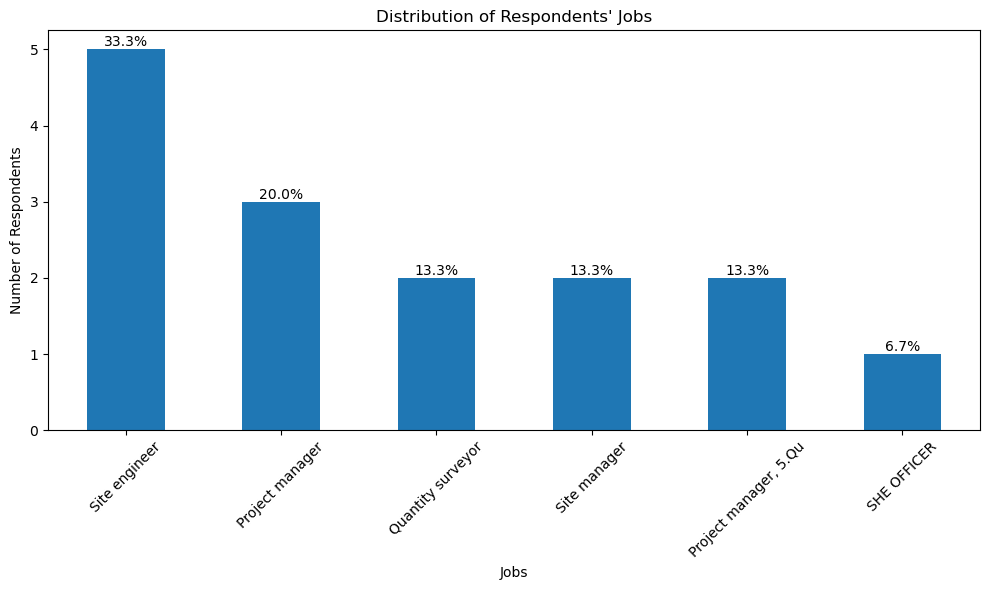

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the number of respondents for each job
job_counts = new_occupational_data['What is your current occupational designation? '].value_counts()

# Calculate the percentage of each job category
job_percentages = job_counts / job_counts.sum() * 100

# Create the bar plot
plt.figure(figsize=(10, 6))
ax = job_counts.plot(kind='bar')
plt.xlabel('Jobs')
plt.ylabel('Number of Respondents')
plt.title('Distribution of Respondents\' Jobs')
plt.xticks(rotation=45)
plt.tight_layout()

# Add labels to the bars
for i, count in enumerate(job_counts):
    percentage = job_percentages[i]
    ax.text(i, count, f'{percentage:.1f}%', ha='center', va='bottom')

# Save the plot as an image file
plt.savefig('respondents_jobs.png', dpi=300)

# Display the plot
plt.show()

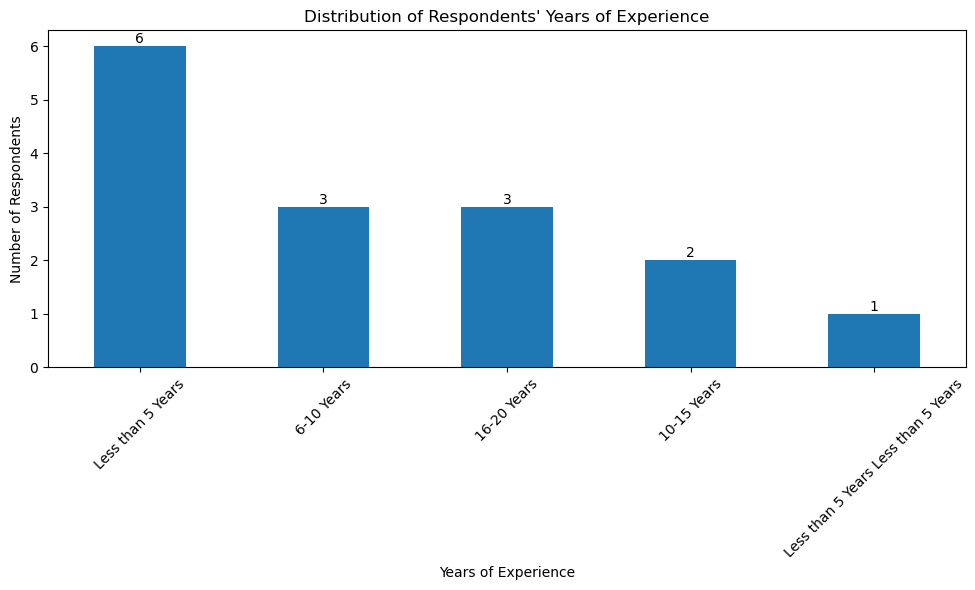

In [25]:
# Count the number of respondents for each years of experience category
exp_counts = new_occupational_data['HOW LONG HAVE YOU BEEN IN THE CONSTRUCTION INDUSTRY'].value_counts()

# Create the bar plot
plt.figure(figsize=(10, 6))
exp_counts.plot(kind='bar')
plt.xlabel('Years of Experience')
plt.ylabel('Number of Respondents')
plt.title('Distribution of Respondents\' Years of Experience')
plt.xticks(rotation=45)
plt.tight_layout()

# Add labels to the bars
for i, count in enumerate(exp_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Save the plot as an image file
plt.savefig('respondents_experience.png', dpi=300)

# Display the plot
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_8940\1725016321.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage = org_years_percentages[i]


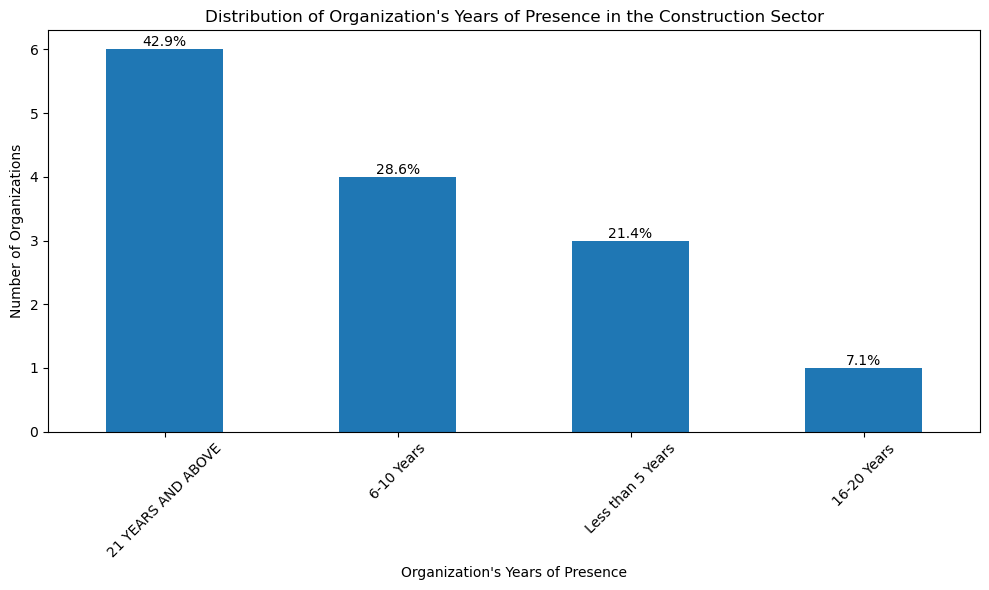

In [28]:
# Count the number of organizations for each years of presence category
org_years_counts = new_occupational_data['What is the duration of your firm\'s presence in the construction sector? '].value_counts()

# Calculate the percentage of each years of presence category
org_years_percentages = org_years_counts / org_years_counts.sum() * 100

# Create the bar plot
plt.figure(figsize=(10, 6))
ax = org_years_counts.plot(kind='bar')
plt.xlabel('Organization\'s Years of Presence')
plt.ylabel('Number of Organizations')
plt.title('Distribution of Organization\'s Years of Presence in the Construction Sector')
plt.xticks(rotation=45)
plt.tight_layout()

# Add labels to the bars with percentages
for i, count in enumerate(org_years_counts):
    percentage = org_years_percentages[i]
    ax.text(i, count, f'{percentage:.1f}%', ha='center', va='bottom')
# Display the plot
plt.show()

In [37]:
new_occupational_data["Do you carry out SHE talk before conducting in construction works? "]
value_to_set = 'Unknown'  # Replace 'Unknown' with the desired value

new_occupational_data["Do you carry out SHE talk before conducting in construction works? "].fillna(value_to_set, inplace=True)

In [38]:
new_occupational_data["Do you carry out SHE talk before conducting in construction works? "]

0         Yes
1         Yes
2         Yes
3         Yes
4         Yes
5         Yes
6     Unknown
7     Unknown
8        Yes 
9         Yes
10    Yes Yes
11        Yes
12      Maybe
13        Yes
14        Yes
Name: Do you carry out SHE talk before conducting in construction works? , dtype: object

In [42]:
# Remove white spaces from a column
# Replace 'Column_Name' with the actual column name in your dataset

new_occupational_data["Do you carry out SHE talk before conducting in construction works? "] = (
    
    new_occupational_data["Do you carry out SHE talk before conducting in construction works? "].str.strip()
)

new_occupational_data["Do you carry out SHE talk before conducting in construction works? "]

0         Yes
1         Yes
2         Yes
3         Yes
4         Yes
5         Yes
6     Unknown
7     Unknown
8         Yes
9         Yes
10    Yes Yes
11        Yes
12      Maybe
13        Yes
14        Yes
Name: Do you carry out SHE talk before conducting in construction works? , dtype: object

In [45]:
column_name = 'Do you carry out SHE talk before conducting in construction works? ' 

new_occupational_data[column_name] = new_occupational_data[column_name].str.replace(r'\b(\w+)(\s+\1)+\b', r'\1', regex=True)
new_occupational_data[column_name]

0         Yes
1         Yes
2         Yes
3         Yes
4         Yes
5         Yes
6     Unknown
7     Unknown
8         Yes
9         Yes
10        Yes
11        Yes
12      Maybe
13        Yes
14        Yes
Name: Do you carry out SHE talk before conducting in construction works? , dtype: object

In [46]:
# Count the occurrences of SHE talk
she_talk_count = new_occupational_data['Do you carry out SHE talk before conducting in construction works? '].value_counts()

# Extract the counts for "Yes" and "No"
yes_count = she_talk_count['Yes']
no_count = she_talk_count['Maybe'] + she_talk_count['Unknown']

# Calculate the percentage of SHE talks conducted
total_count = yes_count + no_count
yes_percentage = (yes_count / total_count) * 100
no_percentage = (no_count / total_count) * 100

# Print the results
print(f"Number of SHE talks conducted: {yes_count}")
print(f"Number of SHE talks not conducted: {no_count}")
print(f"Percentage of SHE talks conducted: {yes_percentage:.2f}%")
print(f"Percentage of SHE talks not conducted: {no_percentage:.2f}%")

Number of SHE talks conducted: 12
Number of SHE talks not conducted: 3
Percentage of SHE talks conducted: 80.00%
Percentage of SHE talks not conducted: 20.00%


In [48]:
new_occupational_data.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
What is your current occupational designation?,Site engineer,Site engineer,Site engineer,Project manager,Project manager,Quantity surveyor,Site engineer,Site manager,SHE OFFICER,"Project manager, 5.Qu",Site manager,Site engineer,Project manager,Quantity surveyor,"Project manager, 5.Qu"
What is the CIFOZ Category of Your Company?,CATEGORY A,CATEGORY A,CATERGORY F,CATERGORY D,CATERGORY E,CATERGORY B,NaN,NaN,CATEGORY A,CATEGORY A,CATEGORY A,CATEGORY A,CATEGORY A,CATEGORY A,CATERGORY B
What is the duration of your firm's presence in the construction sector?,21 YEARS AND ABOVE,Less than 5 Years,Less than 5 Years,6-10 Years,6-10 Years,6-10 Years,21 YEARS AND ABOVE,NaN,21 YEARS AND ABOVE,6-10 Years,Less than 5 Years,21 YEARS AND ABOVE,21 YEARS AND ABOVE,21 YEARS AND ABOVE,16-20 Years
HOW LONG HAVE YOU BEEN IN THE CONSTRUCTION INDUSTRY,Less than 5 Years,Less than 5 Years,Less than 5 Years,6-10 Years,Less than 5 Years,16-20 Years,10-15 Years,Less than 5 Years,10-15 Years,6-10 Years,Less than 5 Years Less than 5 Years,Less than 5 Years,16-20 Years,6-10 Years,16-20 Years
Do you perform root cause analysis for any construction accidents that occur? \n,Yes,Yes,Yes,Yes,Yes,Yes,NaN,NaN,Yes,Yes,Yes,Yes,Yes,Yes,Yes
What is your assessment,VERY GOOD,VERY GOOD,FAIR,GOOD,VERY GOOD,FAIR,NaN,NaN,VERY GOOD,VERY GOOD,FAIR EXCELLENT,GOOD,GOOD,GOOD,VERY GOOD
How does your company provide information about occupational health and safety? Through:,SHE OFFICER,SHE OFFICER,SHE OFFICER,SHE OFFICER,SHE OFFICER,SHE OFFICER,NaN,NaN,SHE OFFICER,SHE OFFICER,SHE OFFICER,SHE OFFICER,SHE OFFICER,AN INTERNAL EMPLOY,SHE OFFICER
Do you carry out SHE talk before conducting in construction works?,Yes,Yes,Yes,Yes,Yes,Yes,Unknown,Unknown,Yes,Yes,Yes,Yes,Maybe,Yes,Yes
Lack of Training,Neutral,Agree,Neutral,Agree,Neutral,Agree,NaN,NaN,NaN,Agree,Disagree Disagree,Disagree,Neutral,strongly disagree,Disagree
Lack of Supervision,Disagree,Agree,Disagree,Strongly disagree,Agree,Strongly agree,NaN,NaN,Agree,Disagree,Strongly disagree Disagree,Disagree,Neutral,Strongly disagree,Disagree


In [50]:
ranking = pd.read_csv("../for_ranking.csv")
ranking.T

,0,1,2,3,4,5,6,7,8,9,10,11,12
Lack of Training,Neutral,Agree,Neutral,Agree,Neutral,Agree,Agree,Disagree,Disagree,Disagree,Neutral,strongly disagree,Disagree
Lack of Supervision,Disagree,Agree,Disagree,Strongly disagree,Agree,Strongly agree,Agree,Disagree,Strongly disagree,Disagree,Neutral,Strongly disagree,Disagree
High stress Levels,strongly disagree,Agree,Agree,Neutral,Agree,Agree,Neutral,Neutral,Agree,Agree,Agree,Strongly Agree,Neutral
Inappropriate Planning,strongly disagree,Neutral,Disagree,Neutral,Agree,Agree,Strongly Agree,Agree,strongly disagree,Disagree,Agree,Strongly Agree,Disagree
Unsafe Site Conditions,Disagree,Agree,Disagree,Agree,Agree,Strongly Agree,Strongly Agree,Disagree,Agree,Strongly Agree,Agree,Strongly Agree,Disagree
\nInsufficient accident investigation and root causes analysis program \n,strongly disagree,Strongly Agree,Neutral,Agree,Agree,Agree,Strongly Agree,Disagree,strongly disagree,Disagree,Disagree,Strongly Agree,Disagree
Reckless operations by employee's,strongly disagree,Agree,Agree,Agree,Disagree,Strongly Agree,Strongly Agree,Agree,Agree,Agree,Agree,Strongly Agree,Neutral
Lack of leadership commitment to safety practices,Agree,Agree,Agree,Strongly Agree,Neutral,Agree,Strongly Agree,strongly disagree,Disagree,Neutral,Agree,Strongly Agree,Disagree
Project Scope creeps,Neutral,Neutral,Neutral,Strongly Agree,Agree,Agree,Neutral,Agree,strongly disagree,Disagree,Agree,Strongly Agree,Disagree
Poorly organized work place,Neutral,Agree,Neutral,Strongly Agree,Disagree,Strongly Agree,Strongly Agree,Disagree,Disagree,Agree,Neutral,Strongly Agree,Disagree


In [51]:
ranking_df = ranking.apply(lambda x: x.str.strip().str.upper() if x.dtype == "object" else x)
ranking_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12
Lack of Training,NEUTRAL,AGREE,NEUTRAL,AGREE,NEUTRAL,AGREE,AGREE,DISAGREE,DISAGREE,DISAGREE,NEUTRAL,STRONGLY DISAGREE,DISAGREE
Lack of Supervision,DISAGREE,AGREE,DISAGREE,STRONGLY DISAGREE,AGREE,STRONGLY AGREE,AGREE,DISAGREE,STRONGLY DISAGREE,DISAGREE,NEUTRAL,STRONGLY DISAGREE,DISAGREE
High stress Levels,STRONGLY DISAGREE,AGREE,AGREE,NEUTRAL,AGREE,AGREE,NEUTRAL,NEUTRAL,AGREE,AGREE,AGREE,STRONGLY AGREE,NEUTRAL
Inappropriate Planning,STRONGLY DISAGREE,NEUTRAL,DISAGREE,NEUTRAL,AGREE,AGREE,STRONGLY AGREE,AGREE,STRONGLY DISAGREE,DISAGREE,AGREE,STRONGLY AGREE,DISAGREE
Unsafe Site Conditions,DISAGREE,AGREE,DISAGREE,AGREE,AGREE,STRONGLY AGREE,STRONGLY AGREE,DISAGREE,AGREE,STRONGLY AGREE,AGREE,STRONGLY AGREE,DISAGREE
\nInsufficient accident investigation and root causes analysis program \n,STRONGLY DISAGREE,STRONGLY AGREE,NEUTRAL,AGREE,AGREE,AGREE,STRONGLY AGREE,DISAGREE,STRONGLY DISAGREE,DISAGREE,DISAGREE,STRONGLY AGREE,DISAGREE
Reckless operations by employee's,STRONGLY DISAGREE,AGREE,AGREE,AGREE,DISAGREE,STRONGLY AGREE,STRONGLY AGREE,AGREE,AGREE,AGREE,AGREE,STRONGLY AGREE,NEUTRAL
Lack of leadership commitment to safety practices,AGREE,AGREE,AGREE,STRONGLY AGREE,NEUTRAL,AGREE,STRONGLY AGREE,STRONGLY DISAGREE,DISAGREE,NEUTRAL,AGREE,STRONGLY AGREE,DISAGREE
Project Scope creeps,NEUTRAL,NEUTRAL,NEUTRAL,STRONGLY AGREE,AGREE,AGREE,NEUTRAL,AGREE,STRONGLY DISAGREE,DISAGREE,AGREE,STRONGLY AGREE,DISAGREE
Poorly organized work place,NEUTRAL,AGREE,NEUTRAL,STRONGLY AGREE,DISAGREE,STRONGLY AGREE,STRONGLY AGREE,DISAGREE,DISAGREE,AGREE,NEUTRAL,STRONGLY AGREE,DISAGREE


In [58]:
import pandas as pd

data = {
    "": [
        "",
        "What is your current occupational designation?",
        "What is the CIFOZ Category of Your Company?",
        "What is the duration of your firm's presence in the construction sector?",
        "HOW LONG HAVE YOU BEEN IN THE CONSTRUCTION INDUSTRY",
        "Do you perform root cause analysis for any construction accidents that occur?",
        "What is your assessment",
        "How does your company provide information about occupational health and safety? Through:",
        "Do you carry out SHE talk before conducting in construction works?",
        "Lack of Training",
        "Lack of Supervision",
        "High stress Levels",
        "Inappropriate Planning",
        "Unsafe Site Conditions",
        "Insufficient accident investigation and root causes analysis program",
        "Reckless operations by employee's",
        "Lack of leadership commitment to safety practices",
        "Project Scope creeps",
        "Poorly organized work place",
        "Poor motivation of worker's",
        "Site congestion",
        "Exposure to toxic accidents",
        "lack of meeting time with employees",
        "Poor Awareness and lack of employee self-protection",
        "poor record keeping and reporting",
        "Falls from work at height"
    ],
    "Strongly Disagree, Fx1": ["" for _ in range(26)],
    "Disagree, Fx2": ["" for _ in range(26)],
    "Neutral, Fx3": ["" for _ in range(26)],
    "Agree, Fx4": ["" for _ in range(26)],
    "Strongly Agree, Fx5": ["" for _ in range(26)],
    "Total": ["" for _ in range(26)],
    "N": ["" for _ in range(26)],
    "A*N": ["" for _ in range(26)],
    "RII": ["" for _ in range(26)],
    "RANK": ["" for _ in range(26)]
}

ranking_dataframe = pd.DataFrame(data)

# Print the resulting dataframe
ranking_dataframe

,,"Strongly Disagree, Fx1","Disagree, Fx2","Neutral, Fx3","Agree, Fx4","Strongly Agree, Fx5",Total,N,A*N,RII,RANK
0,,,,,,,,,,,
1,What is your current occupational designation?,,,,,,,,,,
2,What is the CIFOZ Category of Your Company?,,,,,,,,,,
3,What is the duration of your firm's presence i...,,,,,,,,,,
4,HOW LONG HAVE YOU BEEN IN THE CONSTRUCTION IND...,,,,,,,,,,
5,Do you perform root cause analysis for any con...,,,,,,,,,,
6,What is your assessment,,,,,,,,,,
7,How does your company provide information abou...,,,,,,,,,,
8,Do you carry out SHE talk before conducting in...,,,,,,,,,,
9,Lack of Training,,,,,,,,,,


In [59]:
data = ranking_df
data.T

,0,1,2,3,4,5,6,7,8,9,10,11,12
Lack of Training,NEUTRAL,AGREE,NEUTRAL,AGREE,NEUTRAL,AGREE,AGREE,DISAGREE,DISAGREE,DISAGREE,NEUTRAL,STRONGLY DISAGREE,DISAGREE
Lack of Supervision,DISAGREE,AGREE,DISAGREE,STRONGLY DISAGREE,AGREE,STRONGLY AGREE,AGREE,DISAGREE,STRONGLY DISAGREE,DISAGREE,NEUTRAL,STRONGLY DISAGREE,DISAGREE
High stress Levels,STRONGLY DISAGREE,AGREE,AGREE,NEUTRAL,AGREE,AGREE,NEUTRAL,NEUTRAL,AGREE,AGREE,AGREE,STRONGLY AGREE,NEUTRAL
Inappropriate Planning,STRONGLY DISAGREE,NEUTRAL,DISAGREE,NEUTRAL,AGREE,AGREE,STRONGLY AGREE,AGREE,STRONGLY DISAGREE,DISAGREE,AGREE,STRONGLY AGREE,DISAGREE
Unsafe Site Conditions,DISAGREE,AGREE,DISAGREE,AGREE,AGREE,STRONGLY AGREE,STRONGLY AGREE,DISAGREE,AGREE,STRONGLY AGREE,AGREE,STRONGLY AGREE,DISAGREE
\nInsufficient accident investigation and root causes analysis program \n,STRONGLY DISAGREE,STRONGLY AGREE,NEUTRAL,AGREE,AGREE,AGREE,STRONGLY AGREE,DISAGREE,STRONGLY DISAGREE,DISAGREE,DISAGREE,STRONGLY AGREE,DISAGREE
Reckless operations by employee's,STRONGLY DISAGREE,AGREE,AGREE,AGREE,DISAGREE,STRONGLY AGREE,STRONGLY AGREE,AGREE,AGREE,AGREE,AGREE,STRONGLY AGREE,NEUTRAL
Lack of leadership commitment to safety practices,AGREE,AGREE,AGREE,STRONGLY AGREE,NEUTRAL,AGREE,STRONGLY AGREE,STRONGLY DISAGREE,DISAGREE,NEUTRAL,AGREE,STRONGLY AGREE,DISAGREE
Project Scope creeps,NEUTRAL,NEUTRAL,NEUTRAL,STRONGLY AGREE,AGREE,AGREE,NEUTRAL,AGREE,STRONGLY DISAGREE,DISAGREE,AGREE,STRONGLY AGREE,DISAGREE
Poorly organized work place,NEUTRAL,AGREE,NEUTRAL,STRONGLY AGREE,DISAGREE,STRONGLY AGREE,STRONGLY AGREE,DISAGREE,DISAGREE,AGREE,NEUTRAL,STRONGLY AGREE,DISAGREE


In [67]:
# Create a new dataframe to store the calculations
counts_dataframe = pd.DataFrame(columns=['AGREE', 'DISAGREE', 'NEUTRAL', 'STRONGLY AGREE', 'STRONGLY DISAGREE', 'TOTAL', 'N', 'A*N', 'RII', 'RANK'])

# Iterate over each column in the ranking_dataframe
for column in data.columns:
    # Calculate the value counts for the current column
    value_counts = data[column].value_counts()
    
    # Initialize the counts for each response category
    agree_count = 0
    disagree_count = 0
    neutral_count = 0
    strong_agree_count = 0
    strong_disagree_count = 0
    
    # Update the counts based on the value counts
    if 'AGREE' in value_counts:
        agree_count = value_counts['AGREE']
    if 'DISAGREE' in value_counts:
        disagree_count = value_counts['DISAGREE']
    if 'NEUTRAL' in value_counts:
        neutral_count = value_counts['NEUTRAL']
    if 'STRONGLY AGREE' in value_counts:
        strong_agree_count = value_counts['STRONGLY AGREE']
    if 'STRONGLY DISAGREE' in value_counts:
        strong_disagree_count = value_counts['STRONGLY DISAGREE']

    # Calculate additional metrics
    total_count = agree_count + disagree_count + neutral_count + strong_agree_count + strong_disagree_count
    n_value = agree_count + disagree_count
    a_n_value = agree_count * n_value
    rii_value = (agree_count * 5 + strong_agree_count * 4 + neutral_count * 3 + disagree_count * 2 + strong_disagree_count) / total_count
    
    # Append the counts and additional metrics to the counts_dataframe

    # Append the counts and additional metrics to the counts_dataframe
    counts_dataframe.loc[column] = [agree_count, disagree_count, neutral_count, strong_agree_count, strong_disagree_count, total_count, n_value, a_n_value, rii_value, None]

# Calculate the ranking based on RII
counts_dataframe['RANK'] = counts_dataframe['RII'].rank(ascending=False, method='min')
    
# Assign the calculated counts to the corresponding columns in the ranking_dataframe
# ranking_dataframe['Agree'] = counts_dataframe['Agree']
# ranking_dataframe['Disagree'] = counts_dataframe['Disagree']
# ranking_dataframe['Neutral'] = counts_dataframe['Neutral']
# ranking_dataframe['Strongly Agree'] = counts_dataframe['Strongly Agree']
# ranking_dataframe['Strongly disagree'] = counts_dataframe['Strongly disagree']

# Sort the dataframe by the "RANK" column
counts_dataframe.sort_values('RANK', inplace=True)

# Print the updated ranking_dataframe
counts_dataframe

,AGREE,DISAGREE,NEUTRAL,STRONGLY AGREE,STRONGLY DISAGREE,TOTAL,N,A*N,RII,RANK
Reckless operations by employee's,7.0,1.0,1.0,2.0,1.0,12.0,8.0,56.0,4.083333,1.0
High stress Levels,7.0,0.0,4.0,1.0,1.0,13.0,7.0,49.0,4.000000,2.0
Poor motivation of worker's,7.0,4.0,1.0,1.0,0.0,13.0,11.0,77.0,3.846154,3.0
Unsafe Site Conditions,5.0,4.0,0.0,4.0,0.0,13.0,9.0,45.0,3.769231,4.0
poor record keeping and reporting,6.0,4.0,1.0,2.0,0.0,13.0,10.0,60.0,3.769231,4.0
lack of meeting time with employees,6.0,4.0,2.0,1.0,0.0,13.0,10.0,60.0,3.692308,6.0
Lack of leadership commitment to safety practices,5.0,2.0,2.0,3.0,1.0,13.0,7.0,35.0,3.692308,6.0
Site congestion,4.0,3.0,3.0,3.0,0.0,13.0,7.0,28.0,3.615385,8.0
Project Scope creeps,4.0,2.0,4.0,2.0,1.0,13.0,6.0,24.0,3.461538,9.0
Poorly organized work place,2.0,4.0,3.0,4.0,0.0,13.0,6.0,12.0,3.307692,10.0


In [68]:
counts_dataframe.to_csv("../result.csv")